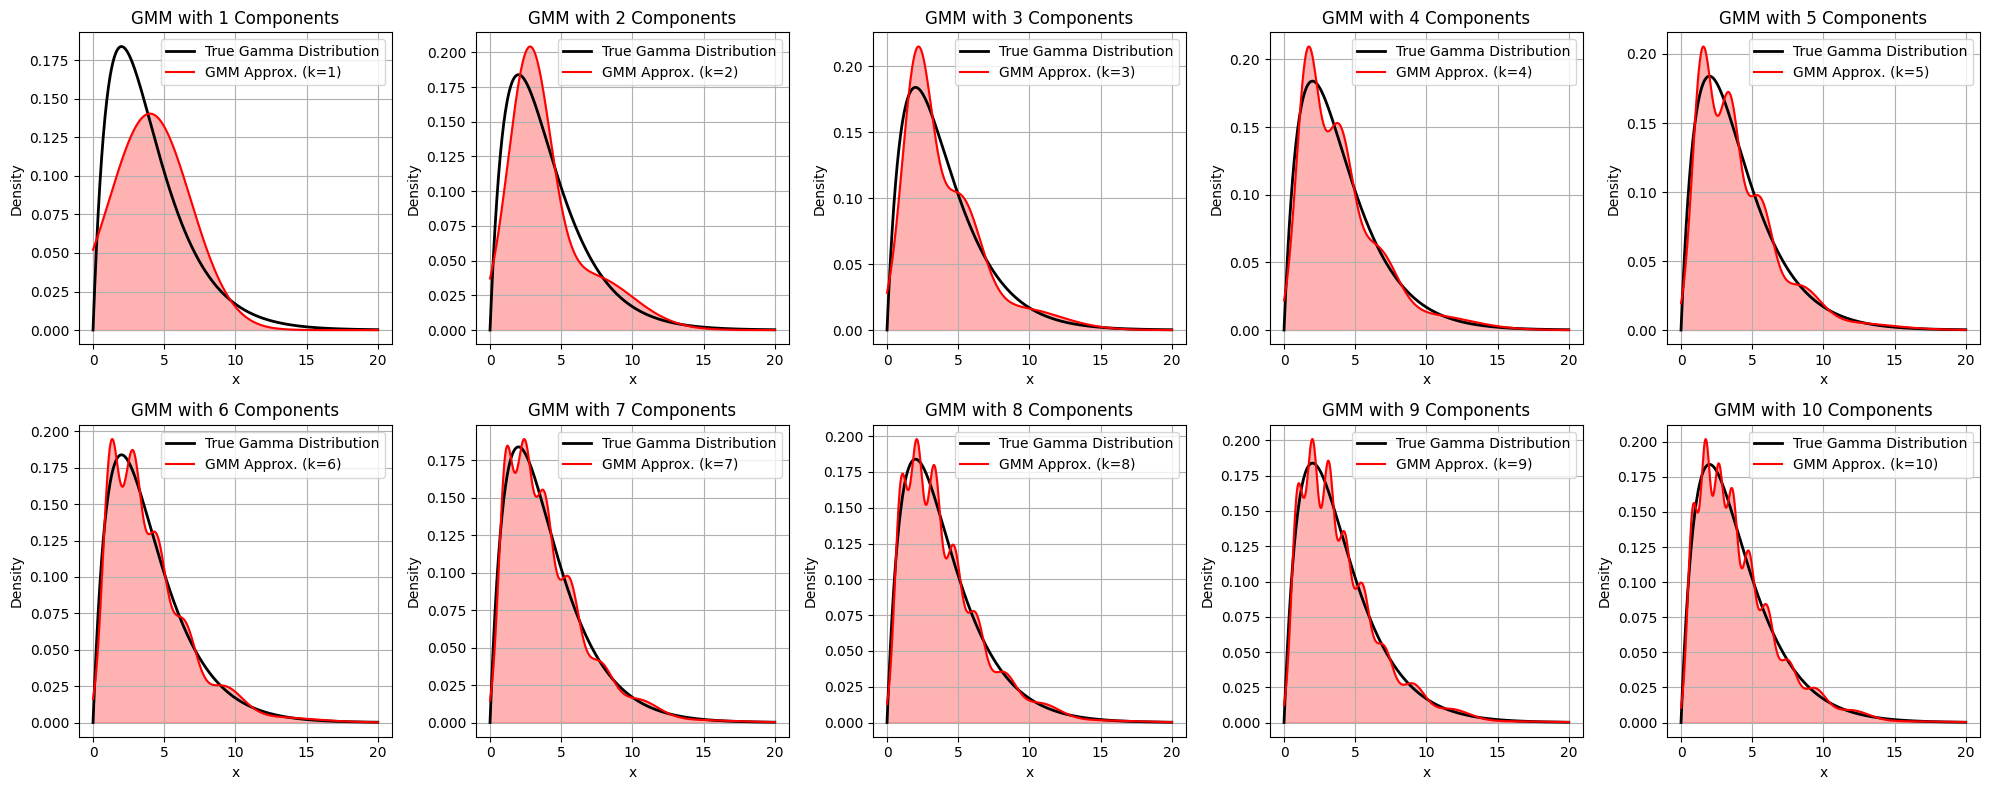

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from sklearn.mixture import GaussianMixture

# Parameters for the true Gamma distribution
shape_param = 2.0  # k (shape parameter)
scale_param = 2.0  # theta (scale parameter)

# Generate sample data from the Gamma distribution
np.random.seed(1)
sample_size = 10000
data = np.random.gamma(shape=shape_param, scale=scale_param, size=sample_size)

# Values to evaluate the PDF
x_values = np.linspace(0, 20, 500)

# Compute the true Gamma PDF
true_pdf = gamma.pdf(x_values, a=shape_param, scale=scale_param)

# Method of sieves: Fit GMM with increasing number of components
max_components = 10  # Maximum number of Gaussian components
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for n_components in range(1, max_components + 1):
    # Fit Gaussian Mixture Model to the data with fixed variance
    gmm = GaussianMixture(n_components=n_components, covariance_type='spherical')
    gmm.fit(data.reshape(-1, 1))  # Reshape data to 2D array

    # Calculate the PDF of the GMM over the x_values
    gmm_pdf = np.exp(gmm.score_samples(x_values.reshape(-1, 1)))

    # Plot the true distribution and GMM approximation
    ax = axes[(n_components - 1) // 5, (n_components - 1) % 5]
    ax.plot(x_values, true_pdf, label='True Gamma Distribution', color='black', linewidth=2)
    ax.plot(x_values, gmm_pdf, label=f'GMM Approx. (k={n_components})', color='red')
    ax.fill_between(x_values, gmm_pdf, alpha=0.3, color='red')

    # Plot settings
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title(f'GMM with {n_components} Components')
    ax.legend()
    ax.grid()

# Adjust layout
plt.tight_layout()
plt.show()
